<a href="https://colab.research.google.com/github/Batuh1907/Batuh1907/blob/IE423/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
dfDgt = pd.read_csv('/content/drive/MyDrive/mnist_fashion_train.csv')
dfDgt.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
dfDgt.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,4.500000,0.000800,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,...,34.564367,23.208633,16.576250,17.831967,22.918850,17.916900,8.485717,2.706333,0.819000,0.070883
std,2.872305,0.092554,0.249033,0.767868,2.512017,4.331376,5.827394,8.309935,14.201820,23.835980,...,57.557779,48.881430,42.044318,43.911297,51.928401,45.173634,29.448614,17.258682,9.133252,2.075829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,16.000000,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000


In [7]:
y = dfDgt['label'].ravel()
X = scale(dfDgt.drop(['label'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

Handwriting 				 Label
AxesImage(size=(28, 28)) 		 9


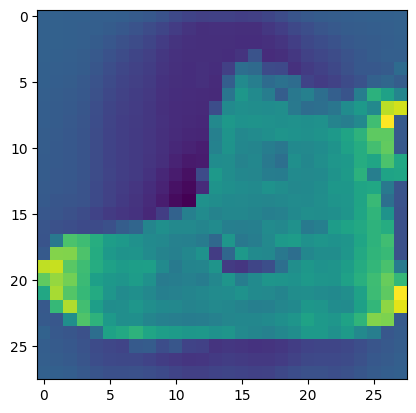

In [7]:
print('Handwriting', '\t\t\t\t', 'Label')
print(plt.imshow(X[0].reshape((28,28))), '\t\t', y[0])

<Axes: ylabel='count'>

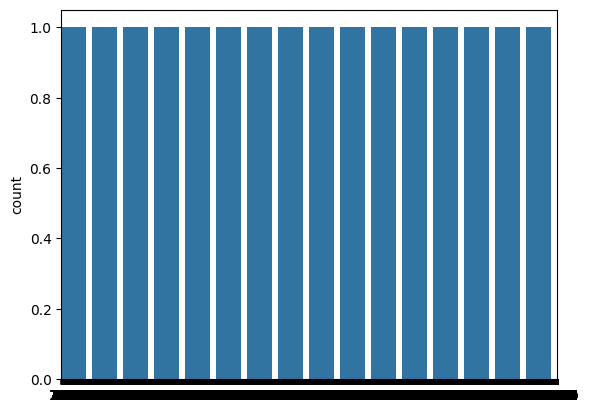

In [8]:
sns.countplot(y)

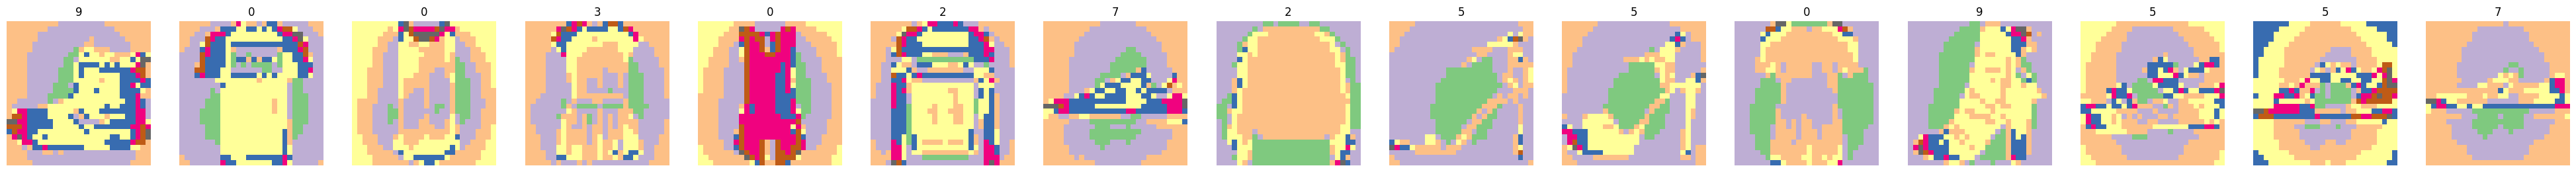

In [13]:
def first_15_images(X, y):
    plt.figure(figsize=(50, 50))
    for i in range(15):
        plt.subplot(1, 15, i+1)
        plt.imshow(X[i].reshape(28, 28), cmap='Accent')
        plt.title(y[i])
        plt.axis('off')
    plt.show()

first_15_images(X, y)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1166
           1       0.97      0.97      0.97      1213
           2       0.77      0.74      0.75      1232
           3       0.86      0.87      0.87      1209
           4       0.73      0.79      0.76      1159
           5       0.93      0.93      0.93      1217
           6       0.64      0.58      0.61      1178
           7       0.91      0.94      0.93      1215
           8       0.94      0.92      0.93      1178
           9       0.94      0.94      0.94      1233

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000

Confusion Matrix:
[[ 969    3   24   55    3    1  101    1    9    0]
 [   5 1177    6   16    3    0    4    2    0    0]
 [  20    3  908    9  169    2  113    1    7    0]
 [  34   17   10 1055   47    0   35    0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


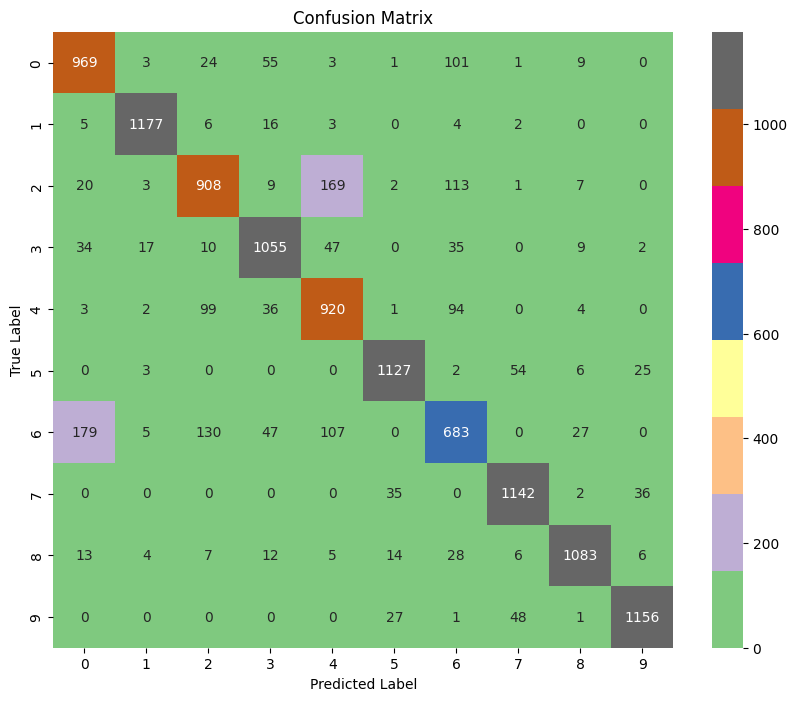

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Accent', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

In [18]:
missing_values = dfDgt.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [19]:
%%time

from sklearn.svm import SVC

mdlSvm = SVC()
mdlSvm.fit(X_train, y_train)
y_test_pred = mdlSvm.predict(X_test)

print ('Classification Report (Support Vector Classifier):')
print (classification_report(y_test, y_test_pred))

Classification Report (Support Vector Classifier):
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1166
           1       0.99      0.98      0.98      1213
           2       0.83      0.81      0.82      1232
           3       0.88      0.90      0.89      1209
           4       0.80      0.85      0.83      1159
           5       0.97      0.95      0.96      1217
           6       0.74      0.66      0.70      1178
           7       0.93      0.96      0.95      1215
           8       0.95      0.97      0.96      1178
           9       0.96      0.94      0.95      1233

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000

CPU times: user 7min 44s, sys: 639 ms, total: 7min 45s
Wall time: 7min 49s


In [24]:
%%time

from sklearn.neural_network import MLPClassifier
mdlNnc = MLPClassifier()
mdlNnc.fit(X_train, y_train)
y_test_pred = mdlNnc.predict(X_test)

print ('Classification Report (Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1166
           1       0.98      0.98      0.98      1213
           2       0.79      0.79      0.79      1232
           3       0.90      0.86      0.88      1209
           4       0.80      0.82      0.81      1159
           5       0.97      0.93      0.95      1217
           6       0.68      0.73      0.71      1178
           7       0.94      0.95      0.94      1215
           8       0.96      0.96      0.96      1178
           9       0.93      0.96      0.94      1233

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000

CPU times: user 4min 6s, sys: 1min 38s, total: 5min 44s
Wall time: 3min 39s


In [26]:
X_score = scale(pd.read_csv('/content/drive/MyDrive/mnist_fashion_test.csv'))

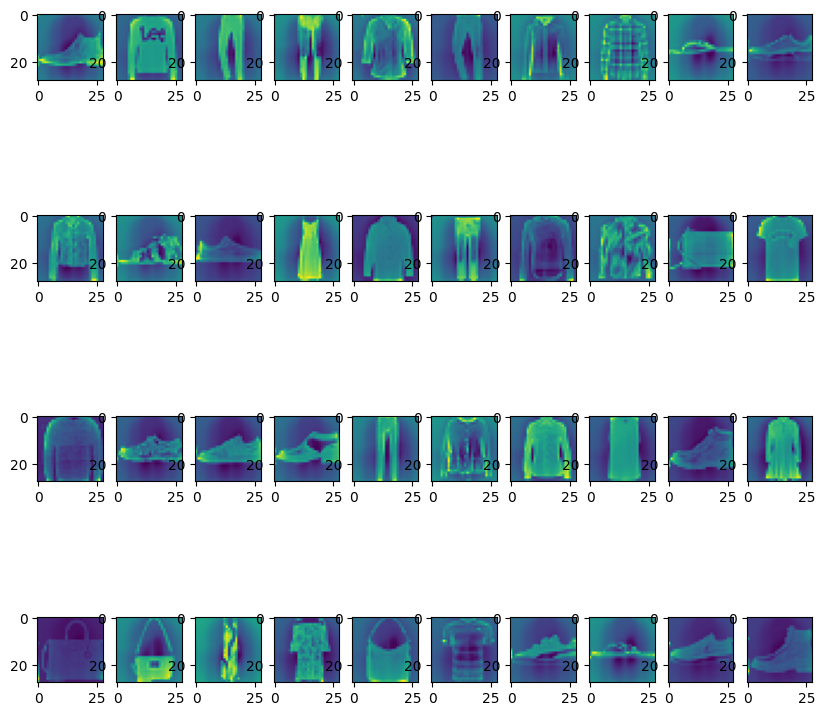

In [35]:
plt.figure(figsize=(10,10))
col, row = 10, 4
for i in range(col*row):
    plt.subplot(row, col, i+1)
    plt.imshow(X_score[i][:784].reshape((28,28)))
plt.show()

In [36]:
print('Predicted Clothes (Neural Network):')
for i in range(col*row):
    if np.mod(i,col) == 0:
        print('\n')
    print(mdlNnc.predict(X_score[i,:784].reshape(1,-1))[0], end=' ')

Predicted Clothes (Neural Network):


9 2 1 1 6 1 4 6 5 7 

2 5 5 3 4 0 6 8 8 0 

2 7 7 5 1 2 6 6 9 4 

8 8 1 8 8 0 7 5 7 9 

In [37]:
%%time

from sklearn.neural_network import MLPClassifier
mdlDnc = MLPClassifier(hidden_layer_sizes=(100,100))
mdlDnc.fit(X_train, y_train)
y_test_pred = mdlDnc.predict(X_test)

print ('Classification Report (Deep Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Deep Neural Network):
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1166
           1       0.99      0.98      0.99      1213
           2       0.81      0.80      0.80      1232
           3       0.89      0.88      0.88      1209
           4       0.79      0.85      0.82      1159
           5       0.96      0.95      0.96      1217
           6       0.70      0.72      0.71      1178
           7       0.96      0.93      0.94      1215
           8       0.96      0.96      0.96      1178
           9       0.94      0.96      0.95      1233

    accuracy                           0.89     12000
   macro avg       0.89      0.88      0.88     12000
weighted avg       0.89      0.89      0.89     12000

CPU times: user 2min 23s, sys: 57.6 s, total: 3min 20s
Wall time: 2min 4s


In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(mdlDnc, X, y, cv=5)

array([0.88366667, 0.882     , 0.8865    , 0.88416667, 0.88891667])